# Plot 1 Channel Only

In [26]:
import Modularized_Data_Processing as mdp
import mne
import glob
import matplotlib.pyplot as plt

filepath = r"C:\Users\Owner\OneDrive - Regis University\laryngeal_bci\data\fifs\second_try\BCIproject_trial-N-1.2-11-2021_raw.fif.gz"

PATH1 = r"C:\Users\Owner\OneDrive - Regis University\laryngeal_bci\data\fifs\\"
PATH2 = r"C:\Users\words\OneDrive - Regis University\laryngeal_bci\data\fifs\\"
FIRST_TRY = "/first_try/"
SECOND_TRY = "/second_try/"
PATH = PATH1 + SECOND_TRY
FILENAME1 = PATH + FIRST_TRY + "BCIproject_trial-S5_raw.fif.gz"
FILENAME2 = PATH + "BCIproject_trial-S3_raw.fif.gz"
FILENAME3 = PATH + "BCIproject_trial-1.2-11-2021_raw.fif.gz"
FILENAME4 = PATH + "BCIproject_trial-S-3.3-25-2021_raw.fif.gz"
S_FILES = [f for f in glob.glob(PATH + '*S*raw.fif.gz')]
N_FILES = [f for f in glob.glob(PATH + '*N*raw.fif.gz')]
NEW_N_FILES = [f for f in glob.glob(PATH + '*N-*raw.fif.gz')]
FILE = FILENAME4
FILENAMES = NEW_N_FILES

#Load data
data = mdp.load_data(FILE)

# data = mdp.load_many_data(FILENAMES)

Opening raw data file C:\Users\Owner\OneDrive - Regis University\laryngeal_bci\data\fifs\\/second_try/BCIproject_trial-S-3.3-25-2021_raw.fif.gz...
    Range : 0 ... 449998 =      0.000 ...   449.998 secs
Ready.
Reading 0 ... 449998  =      0.000 ...   449.998 secs...


In [27]:
%matplotlib widget

### Get channel picks

In [9]:
all_chns = data.info.ch_names
all_chns[1]

'Fp2'

['Fp2']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 5.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 4.00 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1651 samples (1.651 sec)



Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

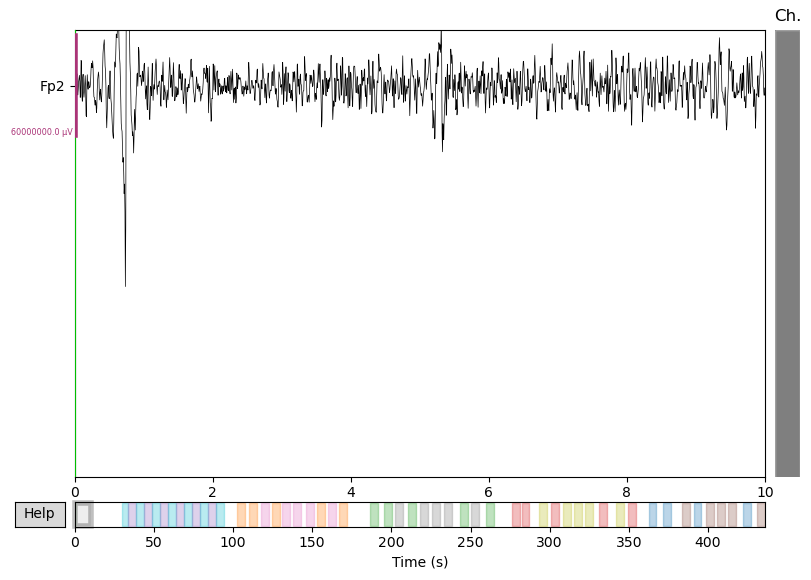

In [21]:
#display raw data

chns = data.info.ch_names

picks = [all_chns[1]]

print(picks)


chn_idxs = []
for chn in picks:
    chn_idxs.append(chns.index(chn))

#apply the bandpass filter

low_fq = 5
hi_fq = 40

crpd_data = data.crop(2)
cd_fd_data = data.filter(5, 50)
    
cd_fd_data.plot(scalings="30", order=chn_idxs, n_channels=4, event_color={1 : "white"})

# Plot All Channels: 1-by-1 

### Get all channels

In [32]:
all_chns = data.info.ch_names

print(all_chns)
print(type(all_chns))

['Fp1', 'Fp2', 'CP1', 'CP2', 'FC1', 'FC2', 'O1', 'O2', 'F7', 'F8', 'Fz', 'Cz', 'T3', 'T4', 'P3', 'P4']
<class 'list'>


In [73]:
import matplotlib.pyplot as plt

#display raw data

chns = data.info.ch_names

if type(all_chns) == list:
    print("check 1")
    picks = all_chns
elif type(all_chns) != list:
    print("check 2")
    picks = [all_chns[1]]

print(picks)


chn_idxs = []
for chn in picks:
    chn_idxs.append(chns.index(chn))

#apply the bandpass filter

low_fq = 5
hi_fq = 40

crpd_data = data.crop(2)
cd_fd_data = data.filter(5, 50)


chn_idx_grp = [chn_idxs[0:2]] #next time work to make chn_idx_grp more robust so it can be used to print whatever channnels a given spectrogram is showing
                              # this is so that I can check noise in spectrograms against the channels composing them
                              # also try to plot the channel raw data for a specific time period
                              # this will be used to understand the noise in a given spectrogram and eventually make an auto filter
     
[plt.show(cd_fd_data.plot(scalings="30", order=chn_idx_grp, n_channels=4, event_color={1 : "white"})) for i in range(len(picks))];

# plt.show(cd_fd_data.plot(scalings="30", order=[chn_idxs[0:2]], n_channels=4, event_color={1 : "white"}))


check 1
['Fp1', 'Fp2', 'CP1', 'CP2', 'FC1', 'FC2', 'O1', 'O2', 'F7', 'F8', 'Fz', 'Cz', 'T3', 'T4', 'P3', 'P4']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 5.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 4.00 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 1651 samples (1.651 sec)



C:\Users\Owner\anaconda3\envs\openBCI\lib\site-packages\mne\viz\raw.py:360: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  inds = inds[reord][order]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

C:\Users\Owner\anaconda3\envs\openBCI\lib\site-packages\mne\viz\raw.py:360: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  inds = inds[reord][order]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

C:\Users\Owner\anaconda3\envs\openBCI\lib\site-packages\mne\viz\raw.py:360: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  inds = inds[reord][order]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

C:\Users\Owner\anaconda3\envs\openBCI\lib\site-packages\mne\viz\raw.py:360: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  inds = inds[reord][order]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

C:\Users\Owner\anaconda3\envs\openBCI\lib\site-packages\mne\viz\raw.py:360: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  inds = inds[reord][order]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

C:\Users\Owner\anaconda3\envs\openBCI\lib\site-packages\mne\viz\raw.py:360: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  inds = inds[reord][order]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

C:\Users\Owner\anaconda3\envs\openBCI\lib\site-packages\mne\viz\raw.py:360: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  inds = inds[reord][order]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

C:\Users\Owner\anaconda3\envs\openBCI\lib\site-packages\mne\viz\raw.py:360: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  inds = inds[reord][order]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

C:\Users\Owner\anaconda3\envs\openBCI\lib\site-packages\mne\viz\raw.py:360: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  inds = inds[reord][order]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

C:\Users\Owner\anaconda3\envs\openBCI\lib\site-packages\mne\viz\raw.py:360: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  inds = inds[reord][order]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

C:\Users\Owner\anaconda3\envs\openBCI\lib\site-packages\mne\viz\raw.py:360: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  inds = inds[reord][order]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

C:\Users\Owner\anaconda3\envs\openBCI\lib\site-packages\mne\viz\raw.py:360: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  inds = inds[reord][order]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

C:\Users\Owner\anaconda3\envs\openBCI\lib\site-packages\mne\viz\raw.py:360: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  inds = inds[reord][order]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

C:\Users\Owner\anaconda3\envs\openBCI\lib\site-packages\mne\viz\raw.py:360: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  inds = inds[reord][order]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

C:\Users\Owner\anaconda3\envs\openBCI\lib\site-packages\mne\viz\raw.py:360: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  inds = inds[reord][order]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

C:\Users\Owner\anaconda3\envs\openBCI\lib\site-packages\mne\viz\raw.py:360: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  inds = inds[reord][order]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …